In [1]:
! pip install pyxlsb
! pip install scikit-learn

## 1. Setup

### 1.1 Libraries

In [2]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np
from  math import sqrt
import os
import pyxlsb as px

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

import warnings
warnings.filterwarnings("ignore")

# sklearn modules
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### 1.2 Data

#### 1.2.1 Data Preparation

In [3]:
# Read Data
# Read SW - All Lead WQ Samples (2010-18).xls
All_Lead_WQ_Samples_xls = pd.ExcelFile('SW - All Lead WQ Samples (2010-18).xls')
SW_All_Lead_WQ_Samples = pd.read_excel(All_Lead_WQ_Samples_xls,'Report1')
# Read SW - Comm pipe data.xls
SW_Comm_pipe_data_xls = pd.ExcelFile('SW - Comm pipe data.xls')
SW_Comm_pipe_data = pd.read_excel(SW_Comm_pipe_data_xls,'Survey Results')
# Read SW - Lead Comm Pipe Replacements (2004-2018).csv
SW_Lead_Comm_Pipe_Replacements = pd.read_csv('SW - Lead Comm Pipe Replacements (2004-2018).csv')
# Read SW - Phosphate Dosing WTWs Y or N.xlsx
SW_Phosphate_Dosing_WTWs_xlsx = pd.ExcelFile('SW - Phosphate Dosing WTWs Y or N.xlsx')
SW_Phosphate_Dosing_WTWs = pd.read_excel(SW_Phosphate_Dosing_WTWs_xlsx,'Phosphate Dosing WTWs Overview')

In [4]:
# Read the Postcodes of SW - Postcodes linked to SW Zonal Structure.xlsb 

list_row=[]
list_accumulate= []

with px.open_workbook('SW - Postcodes linked to SW Zonal Structure.xlsb') as wb:
    row_generator = wb.get_sheet(1).rows()
    for row in row_generator:
        for cell in row:
            list_row.append(cell.v) 
        list_accumulate.append(list_row)
        list_row=[]
Postcodes_excel = pd.DataFrame(list_accumulate[1:],columns = list_accumulate[0])

In [5]:
# Read the Zonal_Structure of SW - Postcodes linked to SW Zonal Structure.xlsb 

list_row=[]
list_accumulate= []

with px.open_workbook('SW - Postcodes linked to SW Zonal Structure.xlsb') as wb:
    row_generator = wb.get_sheet(2).rows()
    for row in row_generator:
        for cell in row:
            list_row.append(cell.v) 
        list_accumulate.append(list_row)
        list_row=[]

Zonal_Structure_excel = pd.DataFrame(list_accumulate[1:],columns = list_accumulate[0])

In [6]:
# Read Data
# Read SW - Scottish Water Zonal Phosphate Levels.xls
SW_Scottish_Water_Zonal_Phosphate_Levels_xlsx = pd.ExcelFile('SW - Scottish Water Zonal Phosphate Levels.xls')
SW_Scottish_Water_Zonal_Phosphate_Levels = pd.read_excel(SW_Scottish_Water_Zonal_Phosphate_Levels_xlsx,'Sheet1')
# Read Other - Postcode_ household count_ urban class.csv
Other_Postcode_household_count_urban_class = pd.read_csv('Other - Postcode_ household count_ urban class.csv')
# Read Other - SAA_PropertyAgeData.csv
Other_SAA_PropertyAgeData = pd.read_csv('Other - SAA_PropertyAgeData.csv', encoding = 'unicode_escape')
# Read Other - UK-HPI-full-file-2019-03.csv
Other_UK_HPI_full_file_201903 = pd.read_csv('Other - UK-HPI-full-file-2019-03.csv')

In [7]:
SW_Scottish_Water_Zonal_Phosphate_Levels.head()

,Sample Date,Sample Number,Sample Comments,Hydrogen ion,Lead,Phosphorus,Temperature,Rig,Region
0,2018-08-03,11922305,NaN,7.7,4.1,436.0,19.3,Ardrishaig Zone (Kilmartin STW),North
1,2018-08-08,11946116,NaN,7.6,2.5,424.0,18.9,Ardrishaig Zone (Kilmartin STW),North
2,2018-08-15,11968896,NaN,7.5,2.3,431.0,15.8,Ardrishaig Zone (Kilmartin STW),North
3,2018-08-20,11977571,NaN,7.7,2.6,424.0,18.5,Ardrishaig Zone (Kilmartin STW),North
4,2018-08-29,12007845,NaN,7.6,2.3,435.0,19.1,Ardrishaig Zone (Kilmartin STW),North


In [8]:
# SW - All Lead WQ Samples
# Result Numeric Entry: Lead concentration in tap water (in µg/l)
# DMA Name: District Meter Area Name
# RSZ Water System Name: Name of Water Treatment Area (Same as column WTW Name (Code) in Phosphate Dosing dataset)
# Sample Template: Type of survey carried out by Scottish Water (survey method closest to random sample is the ‘Scheduled’ sample)
All_Lead_WQ_Samples_xls = pd.ExcelFile('SW - All Lead WQ Samples (2010-18).xls')
SW_All_Lead_WQ_Samples = pd.read_excel(All_Lead_WQ_Samples_xls,'Report1')
#SW_All_Lead_WQ_Samples.info()
SW_All_Lead_WQ_Samples = SW_All_Lead_WQ_Samples[['Result Numeric Entry','DMA Name','DMA Id','RSZ Water System Name','RSZ Water System Id','Sample Template','Street Postcode','District Postcode']]
print(SW_All_Lead_WQ_Samples.columns)
print (SW_All_Lead_WQ_Samples.shape)

Index(['Result Numeric Entry', 'DMA Name', 'DMA Id', 'RSZ Water System Name',
       'RSZ Water System Id', 'Sample Template', 'Street Postcode',
       'District Postcode'],
      dtype='object')
(65532, 8)


In [9]:
SW_All_Lead_WQ_Samples.describe()

,Result Numeric Entry
count,64300.000000
mean,16.234974
std,467.416708
min,0.200000
25%,0.200000
50%,0.500000
75%,4.200000
max,70948.600000


In [10]:
SW_All_Lead_WQ_Samples.columns = ['Result_Numeric_Entry','DMA_Name','DMA_Id','RSZ_Water_System_Name','RSZ_Water_System_Id','Sample_Template','Street_postcode','District_Postcode']
SW_All_Lead_WQ_Samples['Street_postcode'] = SW_All_Lead_WQ_Samples['Street_postcode'].str.replace(' ','')
SW_All_Lead_WQ_Samples['RSZ_Water_System_Name'] = SW_All_Lead_WQ_Samples['RSZ_Water_System_Name'].str.replace(' ','')
SW_All_Lead_WQ_Samples.head()
SW_All_Lead_WQ_Samples = SW_All_Lead_WQ_Samples[SW_All_Lead_WQ_Samples['Street_postcode'].notna()]
SW_All_Lead_WQ_Samples.shape

(39517, 8)

In [11]:
# SW - Comm pipe data
# AGE: Year communication pipe was installed
# Pipe age: Age of communication pipe
# Date: Date of pipe inspection
# Property Type: Type of property serviced by communication pipe
# Pipe material: Type of material communication pipe is made of
# Estimated length of pipe: In meters
SW_Comm_pipe_data_xls = pd.ExcelFile('SW - Comm pipe data.xls')
SW_Comm_pipe_data = pd.read_excel(SW_Comm_pipe_data_xls,'Survey Results')
# SW_Comm_pipe_data.info()
SW_Comm_pipe_data = SW_Comm_pipe_data[['AGE','Pipe age in years from 2019','Date','Property Type','Pipe Material ','Estimated length of pipe in meters','Street postcode']]
SW_Comm_pipe_data.columns = ['Age','Pipe_age','Date','Property_Type','Pipe_Material','pipe_length','Street_postcode']
print(SW_Comm_pipe_data.columns)
SW_Comm_pipe_data = SW_Comm_pipe_data[SW_Comm_pipe_data['Street_postcode'].notna()]
print (SW_Comm_pipe_data.shape)

Index(['Age', 'Pipe_age', 'Date', 'Property_Type', 'Pipe_Material',
       'pipe_length', 'Street_postcode'],
      dtype='object')
(12543, 7)


In [12]:
SW_Comm_pipe_data.describe()

,Age,Pipe_age
count,12542.000000,12543.000000
mean,1943.076623,76.078291
std,21.467283,27.601010
min,1860.000000,49.000000
25%,1930.000000,61.000000
50%,1950.000000,69.000000
75%,1958.000000,89.000000
max,1970.000000,2019.000000


In [13]:
# SW - Lead Comms Pipe Replacement
# WO Completed Status: Outcome of work order
SW_Lead_Comm_Pipe_Replacements = pd.read_csv('SW - Lead Comm Pipe Replacements (2004-2018).csv')
SW_Lead_Comm_Pipe_Replacements.info()
SW_Lead_Comm_Pipe_Replacements = SW_Lead_Comm_Pipe_Replacements[['Street postcode','WO Completed Status']]

SW_Lead_Comm_Pipe_Replacements.columns = ['Street_postcode','WO_Completed_Status']
SW_Lead_Comm_Pipe_Replacements['Street_postcode'] =SW_Lead_Comm_Pipe_Replacements['Street_postcode'].str.replace(' ','')
# SW_Lead_Comm_Pipe_Replacements[['Street_postcode','WO_Completed_Status',]].head()
# print(SW_Lead_Comm_Pipe_Replacements.columns)
SW_Lead_Comm_Pipe_Replacements = SW_Lead_Comm_Pipe_Replacements[SW_Lead_Comm_Pipe_Replacements['Street_postcode'].notna()]
print (SW_Lead_Comm_Pipe_Replacements.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12472 entries, 0 to 12471
Data columns (total 14 columns):
Work Order Id                 12472 non-null int64
Std Job No                    12472 non-null object
WO Completed Status           12331 non-null object
WO Create Date                12472 non-null object
Ads Building Number           9862 non-null object
Ads Eastings                  12472 non-null object
Ads Northings                 12472 non-null object
Ads Operation Area            12472 non-null object
Ads Osapr                     12471 non-null object
Street postcode               12472 non-null object
Ads Post Town                 12472 non-null object
Ads Region                    12472 non-null object
Ads Water Operational Area    12472 non-null object
Ads Water Supply Zone         12460 non-null object
dtypes: int64(1), object(13)
memory usage: 1.3+ MB
(12472, 2)


In [14]:
# SW - Phosphate Dosing WTWs Y or N
# WTW Name (Code): Name of Water Treatment Zone (comparable to RSZ Water System Name in All Lead WQ Samples (2010-2018) (UoE))
# Phosphate Dosing on Site: Whether or not orthophosphate dosing of drinking water occurs in water treatment zone. Orthophosphate is added to water by Scottish Water to stop lead in water distribution pipes reaching customers’ taps.
SW_Phosphate_Dosing_WTWs_xlsx = pd.ExcelFile('SW - Phosphate Dosing WTWs Y or N.xlsx')
SW_Phosphate_Dosing_WTWs = pd.read_excel(SW_Phosphate_Dosing_WTWs_xlsx,'Phosphate Dosing WTWs Overview')
# SW_Phosphate_Dosing_WTWs.info()
SW_Phosphate_Dosing_WTWs = SW_Phosphate_Dosing_WTWs[['WTW Name (Code)','Phosphate Dosing on Site? ']]
SW_Phosphate_Dosing_WTWs.columns = ['WTW_Name','Phosphate_Dosing_on_Site']
SW_Phosphate_Dosing_WTWs['WTW_Name'] = SW_Phosphate_Dosing_WTWs['WTW_Name'].str.replace(' ','')
# SW_Phosphate_Dosing_WTWs[['WTW_Name','Phosphate_Dosing_on_Site']].head()
SW_Phosphate_Dosing_WTWs = SW_Phosphate_Dosing_WTWs[SW_Phosphate_Dosing_WTWs['WTW_Name'].notna()]
print (SW_Phosphate_Dosing_WTWs.shape)

(234, 2)


In [15]:
list_row=[]
list_accumulate= []

with px.open_workbook('SW - Postcodes linked to SW Zonal Structure.xlsb') as wb:
    row_generator = wb.get_sheet(2).rows()
    for row in row_generator:
        for cell in row:
            list_row.append(cell.v) 
        list_accumulate.append(list_row)
        list_row=[]

Postcodes_excel = pd.DataFrame(list_accumulate[1:],columns = list_accumulate[0])
Postcodes_excel = Postcodes_excel[['Street Postcode','District Postcode','WOA_ID','WOA_Name','RSZ_ID','RSZ_Name','WSZ_ID','WSZ_Name','DMA_ID','DMA_Name','Virtual_DMA_ID','Virtual_DMA_Name','Count','Total properties']]
Postcodes_excel.columns = ['Street_postcode','District_Postcode','WOA_ID','WOA_Name','RSZ_ID','RSZ_Name','WSZ_ID','WSZ_Name','DMA_ID','DMA_Name','Virtual_DMA_ID','Virtual_DMA_Name','Count','Total_properties']
                           
Postcodes_excel['Street_postcode'] = Postcodes_excel['Street_postcode'].str.replace(' ','')
# Postcodes_excel.head()
Postcodes_excel = Postcodes_excel[Postcodes_excel['Street_postcode'].notna()]
print (Postcodes_excel.shape)

(173319, 14)


In [16]:
Postcodes_excel.columns

Index(['Street_postcode', 'District_Postcode', 'WOA_ID', 'WOA_Name', 'RSZ_ID',
       'RSZ_Name', 'WSZ_ID', 'WSZ_Name', 'DMA_ID', 'DMA_Name',
       'Virtual_DMA_ID', 'Virtual_DMA_Name', 'Count', 'Total_properties'],
      dtype='object')

In [17]:
Postcodes_excel.describe()

,Total_properties
count,173319.000000
mean,1529.435786
std,924.654149
min,0.000000
25%,832.000000
50%,1475.000000
75%,2108.000000
max,5247.000000


In [18]:
# SW - Scottish Water Zonal Phosphate Levels
# Phosphorus: Amount of orthophosphate dosing in drinking water at Water Treatment Zone 
# Rig: Location of water testing rig which tests for lead concentration and amount of orthophosphate in water

SW_Scottish_Water_Zonal_Phosphate_Levels_xlsx = pd.ExcelFile('SW - Scottish Water Zonal Phosphate Levels.xls')
SW_Scottish_Water_Zonal_Phosphate_Levels = pd.read_excel(SW_Scottish_Water_Zonal_Phosphate_Levels_xlsx,'Sheet1')
SW_Scottish_Water_Zonal_Phosphate_Levels.head()

,Sample Date,Sample Number,Sample Comments,Hydrogen ion,Lead,Phosphorus,Temperature,Rig,Region
0,2018-08-03,11922305,NaN,7.7,4.1,436.0,19.3,Ardrishaig Zone (Kilmartin STW),North
1,2018-08-08,11946116,NaN,7.6,2.5,424.0,18.9,Ardrishaig Zone (Kilmartin STW),North
2,2018-08-15,11968896,NaN,7.5,2.3,431.0,15.8,Ardrishaig Zone (Kilmartin STW),North
3,2018-08-20,11977571,NaN,7.7,2.6,424.0,18.5,Ardrishaig Zone (Kilmartin STW),North
4,2018-08-29,12007845,NaN,7.6,2.3,435.0,19.1,Ardrishaig Zone (Kilmartin STW),North


In [19]:
SW_Scottish_Water_Zonal_Phosphate_Levels.shape

(3583, 9)

In [20]:
# Other - Postcode, household count, urban class
# CensusHouseholdCount2011: Number of households in each street postcode based on Scottish 2011 census
# UrbanRural8Fold2016Code: Code (from 1 to 8) denoting urban/rural location of postcode (on ordinal scale where 1 is city centre and 8 is remote rural)

Other_Postcode_household_count_urban_class = pd.read_csv('Other - Postcode_ household count_ urban class.csv')
Other_Postcode_household_count_urban_class.rename(columns={'Street postcode':'Street_postcode'},inplace=True)
# Other_Postcode_household_count_urban_class.info()
Other_Postcode_household_count_urban_class = Other_Postcode_household_count_urban_class[Other_Postcode_household_count_urban_class['Street_postcode'].notna()]
print (Other_Postcode_household_count_urban_class.shape)

(190150, 58)


In [21]:
Other_Postcode_household_count_urban_class.head()

,Street_postcode,District postcode,Sector postcode,DateOfIntroduction,DateOfDeletion,YearOfDeletion,GridReferenceEasting,GridReferenceNorthing,Latitude,Longitude,...,RegistrationDistrict2007Code,ROACommunityPlanningPartnership2006Code,ROALocal2006Code,StrategicDevelopmentPlanningArea2013Code,TravelToWorkArea2011Code,UrbanRural6Fold2016Code,UrbanRural8Fold2016Code,GridLinkIndicator,GridLinkPositionalAccuracy,NeverDigitised
0,AB452NL,AB45,AB45 2,01/08/1990 00:00,ND,ND,365169,865455,57.677605,-2.585697,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
1,AB452NN,AB45,AB45 2,01/08/1990 00:00,ND,ND,365369,865449,57.677567,-2.582343,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
2,AB452NP,AB45,AB45 2,01/08/1990 00:00,ND,ND,365475,865493,57.677970,-2.580572,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
3,AB452NW,AB45,AB45 2,12/07/1996 00:00,ND,ND,365743,865547,57.678476,-2.576086,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
4,AB452PJ,AB45,AB45 2,01/08/1990 00:00,ND,ND,358760,866116,57.682999,-2.693262,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN


In [22]:
# Other - SAA_PropertyAgeData
# Building_Type: Type of house (e.g. detached, semidetached, terraced)
# Age_Year: Year in which house was built
Other_SAA_PropertyAgeData = pd.read_csv('Other - SAA_PropertyAgeData.csv',encoding ='unicode_escape',sep = ',')
Other_SAA_PropertyAgeData.columns = ['Uprn','Street_postcode','Building_Type','Age_Year','Age_Category','Xcoord','Ycoord']
Other_SAA_PropertyAgeData['Street_postcode'] = Other_SAA_PropertyAgeData['Street_postcode'].str.replace(' ','')
Other_SAA_PropertyAgeData = Other_SAA_PropertyAgeData[Other_SAA_PropertyAgeData['Street_postcode'].notna()]
Other_SAA_PropertyAgeData.shape

(2205352, 7)

In [23]:
# Other - UK-HPI-full-file-2019-08
# CouncilArea2018Code: This column can be used to link datasets
# AveragePrice: Average house price in region in each date

Other_UK_HPI_full_file_201903 = pd.read_csv('Other - UK-HPI-full-file-2019-03.csv')
# Other_UK_HPI_full_file_201903.info()
Other_UK_HPI_full_file_201903.head()

,Date,Year2,RegionName,CouncilArea2018Code,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [24]:
# Merge the datasets
data_join =  pd.merge(SW_All_Lead_WQ_Samples,SW_Comm_pipe_data,on = 'Street_postcode',how = 'left')
data_join =  pd.merge(data_join,SW_Lead_Comm_Pipe_Replacements,on = 'Street_postcode',how = 'left')
data_join =  pd.merge(data_join,SW_Phosphate_Dosing_WTWs,left_on = 'RSZ_Water_System_Name',right_on = 'WTW_Name',how = 'left')
data_join =  pd.merge(data_join,Postcodes_excel,on = 'Street_postcode',how = 'left')
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63342 entries, 0 to 63341
Data columns (total 30 columns):
Result_Numeric_Entry        61840 non-null float64
DMA_Name_x                  63342 non-null object
DMA_Id                      60469 non-null object
RSZ_Water_System_Name       63342 non-null object
RSZ_Water_System_Id         62138 non-null object
Sample_Template             63342 non-null object
Street_postcode             63342 non-null object
District_Postcode_x         63342 non-null object
Age                         23589 non-null float64
Pipe_age                    23594 non-null float64
Date                        23419 non-null datetime64[ns]
Property_Type               23580 non-null object
Pipe_Material               23463 non-null object
pipe_length                 23428 non-null object
WO_Completed_Status         12204 non-null object
WTW_Name                    39019 non-null object
Phosphate_Dosing_on_Site    39019 non-null object
District_Postcode_y         62

In [25]:
# The shape of the created dataset
data_join.shape

(63342, 30)

In [26]:
data_join.head()

,Result_Numeric_Entry,DMA_Name_x,DMA_Id,RSZ_Water_System_Name,RSZ_Water_System_Id,Sample_Template,Street_postcode,District_Postcode_x,Age,Pipe_age,...,RSZ_ID,RSZ_Name,WSZ_ID,WSZ_Name,DMA_ID,DMA_Name_y,Virtual_DMA_ID,Virtual_DMA_Name,Count,Total_properties
0,42.0,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LY,G14,1925.0,94.0,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0
1,0.2,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149PD,G14,NaN,NaN,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0
2,0.8,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149JJ,G14,NaN,NaN,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0
3,0.4,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LZ,G14,NaN,NaN,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0
4,0.2,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,SCHEDULED,G149LY,G14,1925.0,94.0,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0


#### 1.2.2 Data Cleaning

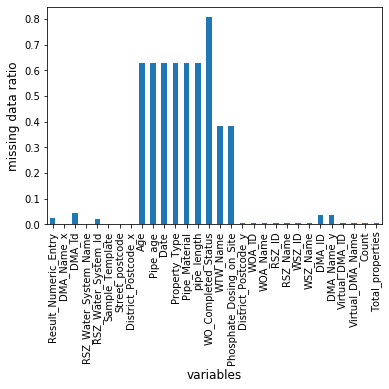

21

In [27]:
# Imputation of missing values
missing_ratio=data_join.isna().sum(axis = 0)/data_join.shape[0]
ax = missing_ratio.plot.bar(x='variables', y='missing data ratio', rot=90)
ax.set_xlabel("variables", fontsize=12)
ax.set_ylabel("missing data ratio", fontsize=12)
plt.show()
sum(missing_ratio<0.3)

In [28]:
fulldat=data_join[missing_ratio.index[missing_ratio<0.3]]
fulldat['Result_Numeric_Entry']=fulldat['Result_Numeric_Entry'].apply(lambda x:float(str(x).replace(',','.').split()[-1]))
fulldat['Result_Numeric_Entry'][fulldat['Result_Numeric_Entry'].isna()]=np.mean(fulldat['Result_Numeric_Entry'])
fulldat.head()

,Result_Numeric_Entry,DMA_Name_x,DMA_Id,RSZ_Water_System_Name,RSZ_Water_System_Id,Sample_Template,Street_postcode,District_Postcode_x,District_Postcode_y,WOA_ID,...,RSZ_ID,RSZ_Name,WSZ_ID,WSZ_Name,DMA_ID,DMA_Name_y,Virtual_DMA_ID,Virtual_DMA_Name,Count,Total_properties
0,42.0,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LY,G14,G14,WOA000402,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0
1,0.2,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149PD,G14,G14,WOA000402,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0
2,0.8,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149JJ,G14,G14,WOA000402,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0
3,0.4,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LZ,G14,G14,WOA000402,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0
4,0.2,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,SCHEDULED,G149LY,G14,G14,WOA000402,...,RSZ004060,Milngavie M4c,WSZ001641,M4 Mugdock C WSZ,DMA001829,Abbey Drive DMA,DMA001829,Abbey Drive DMA,,804.0


In [29]:
# remove outliers lying beyond 99.5% confidential interval
# pd.get_dummies(fulldat, columns=fulldat.columns[1:-1]).head()
fulldat=fulldat[fulldat['Result_Numeric_Entry']<np.quantile(fulldat['Result_Numeric_Entry'],0.995)]
fulldat['Result_Numeric_Entry'].fillna(np.mean(fulldat['Result_Numeric_Entry']))
fulldat.shape

(63023, 21)

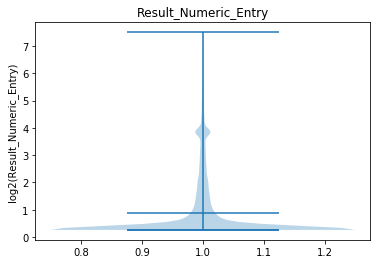

In [30]:
# Export data file of joined data
fulldat.to_csv('/Users/shuo/Desktop/Lead piping/Data/fulldat.csv',header=True,index=False,sep='\t')
fulldat=pd.read_csv('/Users/shuo/Desktop/Lead piping/Data/fulldat.csv',header=0,sep='\t')
fulldat.head()
fig1, ax1 = plt.subplots()
# Plot violin plot
ax1.violinplot(np.log2(1+fulldat['Result_Numeric_Entry']),
                   showmeans=True,
                   showmedians=True)
ax1.set_title('Result_Numeric_Entry')
ax1.set_ylabel("log2(Result_Numeric_Entry)")


plt.show()

## 2. Exploratory Data Analysis and Preprocessing

Exploratory Data Analysis (EDA) divided into two parts. Part One is to analyse the dataset we created from several datasets supplied by Scottish Water and the Scottish Assessors Association. Part Two joint the dataset which we did not use in the created dataset to do the Exploratory Data Analysis (EDA), in order to find the correlation among variables that we did not choose in the created dataset.

### 2.1 Part One

#### 2.1.1 Variable Description

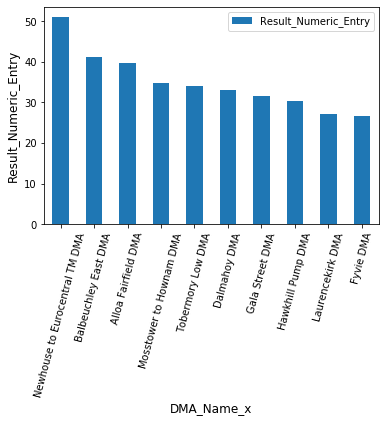

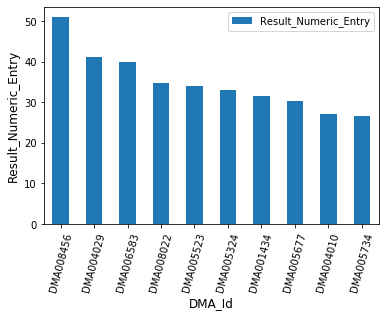

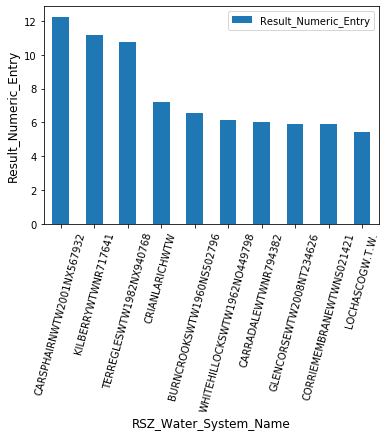

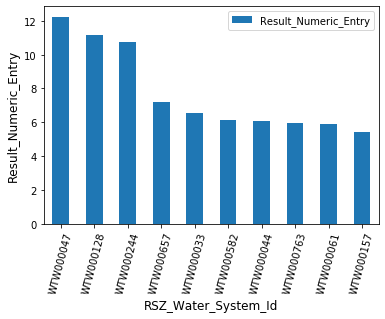

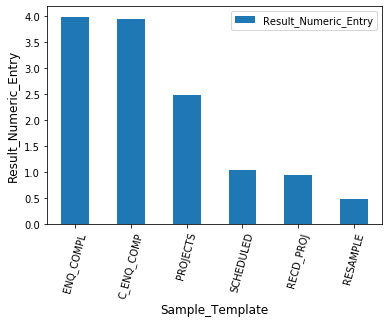

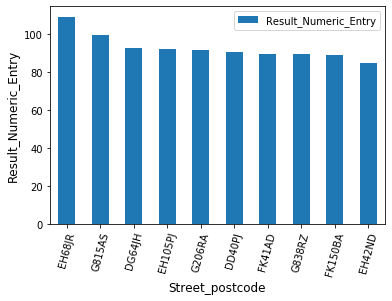

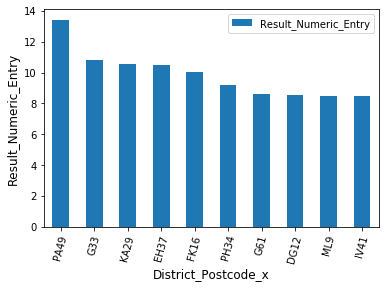

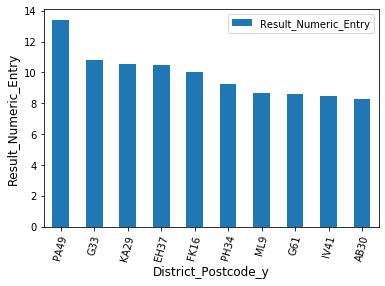

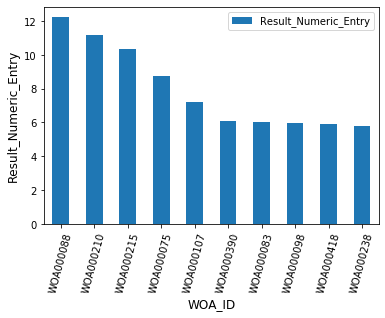

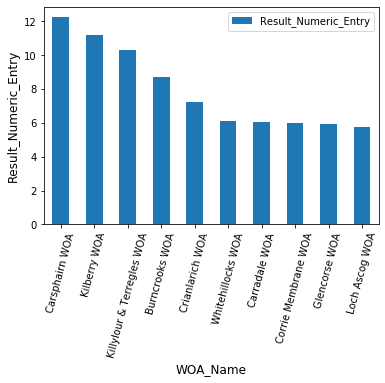

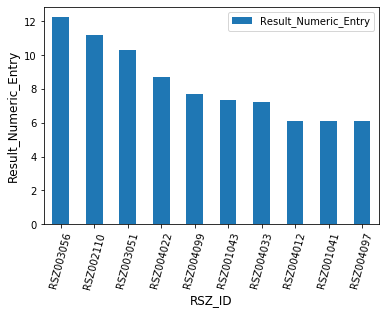

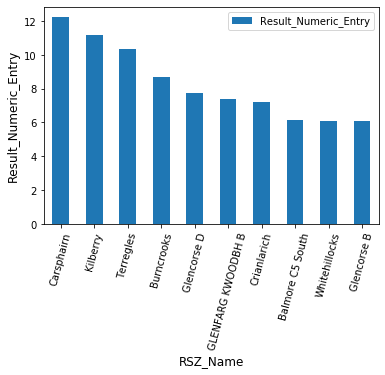

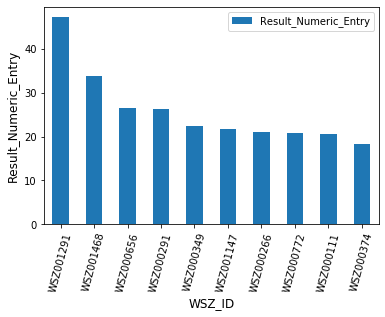

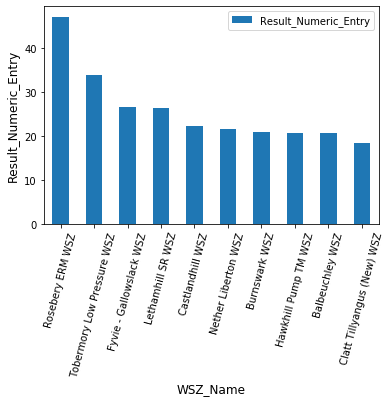

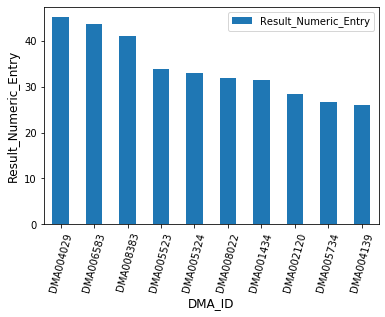

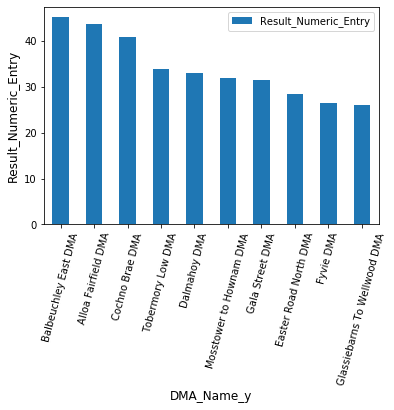

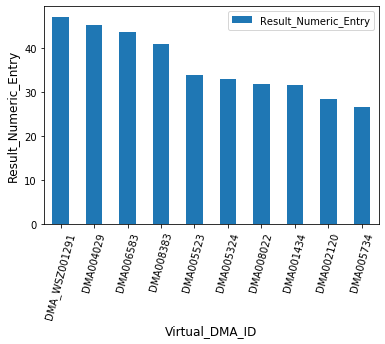

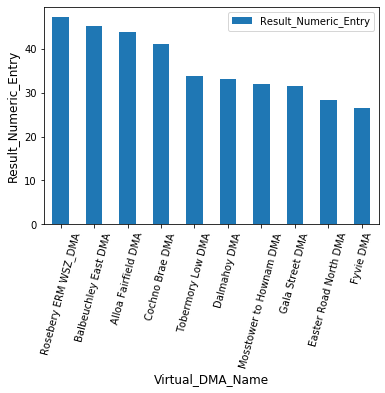

In [31]:
fulldat=pd.read_csv('/Users/shuo/Desktop/Lead piping/Data/fulldat.csv',header=0,sep='\t')

for col in fulldat.columns[1:-2]:
    df=fulldat[['Result_Numeric_Entry',col]].groupby(col).mean()
    top10=df.sort_values('Result_Numeric_Entry',ascending=False).head(10)
    top10[col]=top10.index
    ax = top10.plot.bar(x=col, y='Result_Numeric_Entry', rot=75)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Result_Numeric_Entry", fontsize=12)
    plt.show()

#### 2.1.2 Feature Selection

In [32]:
# Feature selection
input_fs=fulldat.copy()
for col in input_fs.columns[1:-1]:
    input_fs[col]=pd.factorize(fulldat[col])[0]
input_fs.fillna(0)
input_fs.head()
input_fs.Total_properties[input_fs.Total_properties.isna()]=input_fs.Total_properties.mean()
target=input_fs['Result_Numeric_Entry']#convert continous var to discrete var in order to selecte sig features
target[target>target.mean()]=1
target[target!=1]=0
input_fs['Result_Numeric_Entry']=target

In [33]:
# Libraries
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(input_fs.iloc[:,1:], input_fs['Result_Numeric_Entry'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1.Street_postcode (0.460020)
2.Sample_Template (0.098146)
3.Total_properties (0.033454)
4.Count (0.030019)
5.District_Postcode_x (0.028977)
6.DMA_Name_x (0.028820)
7.DMA_Id (0.028469)
8.District_Postcode_y (0.028121)
9.WOA_Name (0.023488)
10.WOA_ID (0.023326)
11.RSZ_Water_System_Id (0.023222)
12.RSZ_Water_System_Name (0.023006)
13.Virtual_DMA_ID (0.022353)
14.Virtual_DMA_Name (0.022343)
15.DMA_ID (0.022159)
16.DMA_Name_y (0.022081)
17.RSZ_ID (0.020962)
18.WSZ_Name (0.020674)
19.WSZ_ID (0.020261)
20.RSZ_Name (0.020100)


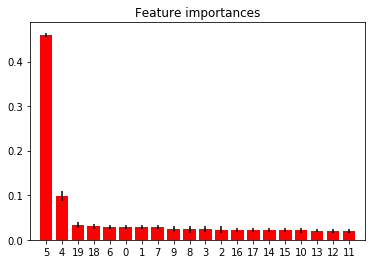

In [34]:
# Print the feature ranking
print("Feature ranking:")
features=input_fs.columns[1:]
for f in range(input_fs.shape[1]-1):
    print("%d.%s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(input_fs.shape[1]-1), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(input_fs.shape[1]-1), indices)
plt.xlim([-1, input_fs.shape[1]-1])
plt.show()

#### 2.1.3 Cluster of Postcodes Harbouring High Level Lead Concentration

We get the 'factorize_dat.txt' and 'fulldat.txt' files from the following codes, and these files could help to plot the heatmap in R to complete this part.

In [35]:
input_fs.to_csv('factorize_dat.txt',header=True,index=False,sep='\t')

In [36]:
fulldat.to_csv('fulldat.txt',header=True,index=False,sep='\t')

#### 2.1.4 The Distribution of High-Level Lead in the Map

In [37]:
# Libraries 
import folium
from folium.plugins import HeatMap

posi=pd.read_csv("latlon.txt",header=0,sep='\t')
posi=posi[-posi.Latitude.isna()]
lat = np.array(posi["Latitude"]) # Get latitude value
lon = np.array(posi["Longitude"]) #Get longitude value
weight=posi.entry
weight=(weight-min(weight))/(max(weight)-min(weight))
wei = np.array(weight)
data1 = [[lat[i],lon[i],wei[i]] for i in range(posi.shape[0])]    # Make the data into the form of [lats,lons,weights]
map_osm = folium.Map(location=[1,2],zoom_start=1)   # Draw the map and start zooming by 5 times
HeatMap(data1).add_to(map_osm) # Add the heat map to the map created former
file_path = r"./heatmap.html" # Save as html file
map_osm.save(file_path)  # # The default browser opens

### 2.2 Part Two

#### 2.2.1 Data preparation 

In [38]:
data_join =  pd.merge(SW_All_Lead_WQ_Samples,SW_Comm_pipe_data,on = 'Street_postcode',how = 'left')
data_join =  pd.merge(data_join,SW_Lead_Comm_Pipe_Replacements,on = 'Street_postcode',how = 'left')
data_join =  pd.merge(data_join,SW_Phosphate_Dosing_WTWs,left_on = 'RSZ_Water_System_Name',right_on = 'WTW_Name',how = 'left')
data_join =  pd.merge(data_join,Postcodes_excel,on = 'Street_postcode',how = 'left')
data_join =  pd.merge(data_join,Other_SAA_PropertyAgeData,on = 'Street_postcode',how = 'left')
data_join =  pd.merge(data_join,Other_Postcode_household_count_urban_class,on = 'Street_postcode',how = 'left')
data_join.head()

,Result_Numeric_Entry,DMA_Name_x,DMA_Id,RSZ_Water_System_Name,RSZ_Water_System_Id,Sample_Template,Street_postcode,District_Postcode_x,Age,Pipe_age,...,RegistrationDistrict2007Code,ROACommunityPlanningPartnership2006Code,ROALocal2006Code,StrategicDevelopmentPlanningArea2013Code,TravelToWorkArea2011Code,UrbanRural6Fold2016Code,UrbanRural8Fold2016Code,GridLinkIndicator,GridLinkPositionalAccuracy,NeverDigitised
0,42.0,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LY,G14,1925.0,94.0,...,S12000046,NaN,NaN,S11000004,S22000065,1.0,1.0,Y,1.0,NaN
1,42.0,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LY,G14,1925.0,94.0,...,S12000046,NaN,NaN,S11000004,S22000065,1.0,1.0,Y,1.0,NaN
2,42.0,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LY,G14,1925.0,94.0,...,S12000046,NaN,NaN,S11000004,S22000065,1.0,1.0,Y,1.0,NaN
3,42.0,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LY,G14,1925.0,94.0,...,S12000046,NaN,NaN,S11000004,S22000065,1.0,1.0,Y,1.0,NaN
4,42.0,Abbey Drive DMA,DMA001829,MILNGAVIEWTW2007NS562760,WTW000182,C_ENQ_COMP,G149LY,G14,1925.0,94.0,...,S12000046,NaN,NaN,S11000004,S22000065,1.0,1.0,Y,1.0,NaN


In [39]:
SW_All_Lead_WQ_Samples.describe()

,Result_Numeric_Entry
count,38593.000000
mean,11.747047
std,463.631101
min,0.200000
25%,0.200000
50%,0.200000
75%,0.600000
max,70948.600000


#### 2.2.2 Data preparation 

In [40]:
# Feature Selection

data_join_1 = data_join[['Street_postcode','Result_Numeric_Entry','Age','Pipe_age','pipe_length','Property_Type','Pipe_Material','Phosphate_Dosing_on_Site','Count','Total_properties','Age_Year','UrbanRural8Fold2016Code']]
# data_join_1  = data_join_1.dropna()
# data_join_1  = data_join_1 [data_join_1.Street_postcode.notnull()]
data_join_1.describe()
data_join_1['pipe_length'] = data_join_1['pipe_length'].str.replace(' ','')

In [41]:
set(data_join_1.Property_Type)
Property_Type_Set = {'Detached':0,'Flat':1,'Other':2,'Other (Specify)':3,'Semi Detached':4,'Tenement':5,'Terraced':6}
Pipe_Material_Set = {'Copper':0,'Lead':1,'PVC':2,'Poly':3}
Phosphate_Dosing_on_Site_Set = {'No':0,'Yes':1}
pipe_length_Set = {'1-5':0,'6-10':1,'11-15':2,'16-20':3,'>20':4,'1m':0,'1M':0,'2m':0,'2M':0,'3m':0,'3M':0,'4m':0,'4M':0,'5m':0,'5M':0,'6m':1,'6M':1,'7m':1,'7M':1,'8m':1,'8M':1,'9m':1,'9M':1}
# pipe_length_Set = {'1-5':0,'6-10'：1,'11-15':2,'16-20':3,'>20':4,'1m':0,'1M':0,'2m':0,'2M':0,'3m':0,'3M':0,'4m':0,'4M':0,'5m':0,'5M':0,'6m':1,'6M':1,'7m':1,'7M':1,'8m':1,'8M':1,'9m':1,'9M':1}

data_join_1['Property_Type'] = data_join_1['Property_Type'].map(Property_Type_Set)
data_join_1['Pipe_Material'] = data_join_1['Pipe_Material'].map(Pipe_Material_Set)
data_join_1['Phosphate_Dosing_on_Site'] = data_join_1['Phosphate_Dosing_on_Site'].map(Phosphate_Dosing_on_Site_Set)
data_join_1['pipe_length'] = data_join_1['pipe_length'].map(pipe_length_Set)

In [42]:
data_join_1.describe()

,Result_Numeric_Entry,Age,Pipe_age,pipe_length,Property_Type,Pipe_Material,Phosphate_Dosing_on_Site,Total_properties,Age_Year,UrbanRural8Fold2016Code
count,1.174602e+06,408998.000000,409118.000000,391345.000000,403689.000000,405953.000000,717264.000000,1.197364e+06,511657.00000,1.201468e+06
mean,1.254456e+01,1945.796578,73.774151,0.752323,2.505761,1.513611,0.752418,1.204572e+03,1947.72564,3.994691e+00
std,4.328139e+02,20.630347,39.187833,1.131656,2.544788,1.469349,0.431608,9.549617e+02,51.81873,2.733190e+00
min,2.000000e-01,1860.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1107.00000,1.000000e+00
25%,2.000000e-01,1939.000000,57.000000,0.000000,0.000000,0.000000,1.000000,3.340000e+02,1914.00000,2.000000e+00
50%,2.000000e-01,1950.000000,69.000000,0.000000,2.000000,1.000000,1.000000,1.132000e+03,1960.00000,3.000000e+00
75%,9.000000e-01,1962.000000,80.000000,1.000000,5.000000,3.000000,1.000000,1.821000e+03,1989.00000,7.000000e+00
max,7.094860e+04,1970.000000,2019.000000,4.000000,6.000000,3.000000,1.000000,5.247000e+03,2013.00000,8.000000e+00


In [43]:
print(data_join_1.isnull().sum())

Street_postcode                  0
Result_Numeric_Entry         27610
Age                         793214
Pipe_age                    793094
pipe_length                 810867
Property_Type               798523
Pipe_Material               796259
Phosphate_Dosing_on_Site    484948
Count                         4848
Total_properties              4848
Age_Year                    690555
UrbanRural8Fold2016Code        744
dtype: int64


In [44]:
data_join_1.shape

(1202212, 12)

In [45]:
data_join_1 = data_join_1.dropna()

In [46]:
data_join_1.shape

(97493, 12)

In [47]:
data_join_1['Result_Numeric_Entry'].describe()

count    97493.000000
mean         4.848050
std         28.873606
min          0.200000
25%          0.200000
50%          0.400000
75%          2.000000
max        605.500000
Name: Result_Numeric_Entry, dtype: float64

#### 2.2.3 Univariate Analysis

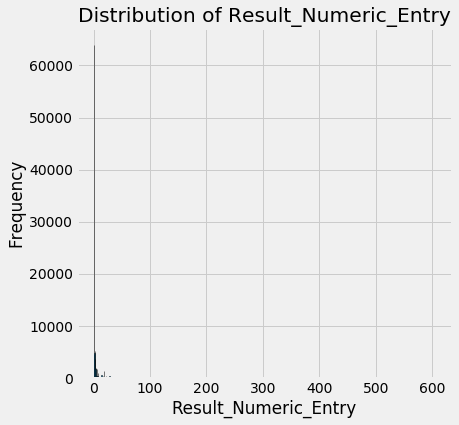

In [48]:
# Single variable plots
# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize
def plotDistance(data, flag, nbins):
    figsize(6, 6)

    # Histogram of Result_Numeric_Entry
    plt.style.use('fivethirtyeight')
    plt.hist(data.dropna(), bins = nbins, edgecolor = 'k');
    if(flag == 'True'):
        plt.yscale('log')
    else:
        plt.yscale('linear')
    plt.xlabel('Result_Numeric_Entry'); plt.ylabel('Frequency'); 
    plt.title('Distribution of Result_Numeric_Entry');
    plt.show();

plotDistance(data_join_1['Result_Numeric_Entry'], False, 1000)

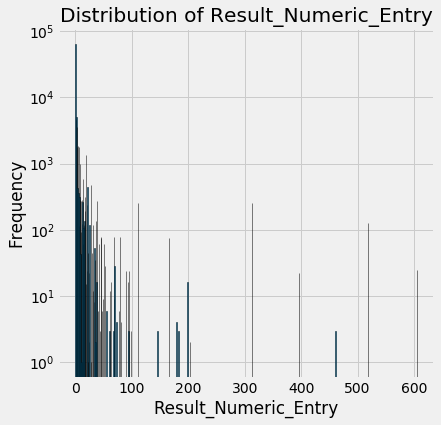

In [49]:
plotDistance(data_join_1['Result_Numeric_Entry'], 'True', 1000)

In [50]:
# Calculate the first and third quartile
first_quartile = data_join_1['Result_Numeric_Entry'].describe()['25%']
third_quartile = data_join_1['Result_Numeric_Entry'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers with large distances only
data_join_2 = data_join_1[(data_join_1['Result_Numeric_Entry'] < (first_quartile + 3 * iqr))]

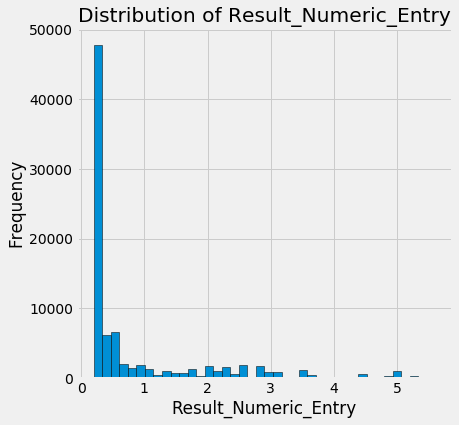

In [51]:
plotDistance(data_join_2['Result_Numeric_Entry'], 'False', 40)

#### 2.2.4 The Correlation among Different Variables

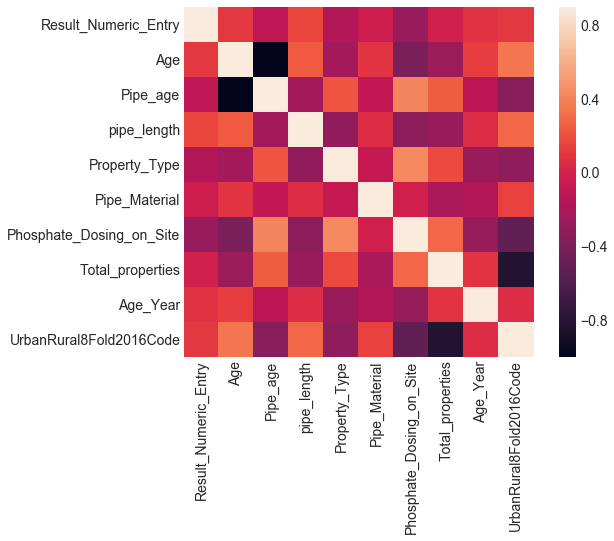

In [52]:
color = sns.color_palette()
sns.set_style('darkgrid')

#Correlation map to see how features are correlated 
correlation_matrix = data_join_2.corr()
plt.subplots(figsize=(8,6))
_=sns.heatmap(correlation_matrix, vmax=0.9, square=True);
plt.show()